<a href="https://colab.research.google.com/github/TheClockworkk/ML-Labs-Homeworks/blob/main/lab2_pygmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ТЗ к лабораторной работе №2:**
1. Найти оптимумы тестовых функций для оптимизации двумя алгоритмами библиотеки pygmo.

В качестве тестовых функций были выбраны функция Химельблау и функция Матьяса. В качестве алгоритмов были выбраны SGA и SaDE.

2. Сконструировать алгоритмическую проблему оптимизации и решить ее при помощи библиотеки pygmo.


In [135]:
!pip install pygmo
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Задача 1: Найти оптимумы тестовых функций для оптимизации двумя алгоритмами библиотеки pygmo.

Задаем функцию Химмельблау функционально и через классы, второй вариант нужен для скармливания pygmo

In [136]:
import numpy as np
def himmelblau(x: np.array, y: np.array) -> float:
  return (x**2 + y-11)**2 + (x+y**2-7)**2

In [137]:
import pygmo as pg
class Himenblau():
  @staticmethod
  def fitness(x):
        return [(x[0]**2 + x[1]-11)**2 + (x[0]+x[1]**2-7)**2]

  @staticmethod
  def get_bounds():
    return ([-5, -5], [5, 5])
    
  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

In [138]:
hi = Himenblau()

print(hi.fitness)

<function Himenblau.fitness at 0x7f18acfddaf0>


Поиск глобального минимума генетическим алгоритмом pygmo Simple Genetic Algorithm


In [139]:
algo = pg.algorithm(pg.sga(gen=1000))
prob = pg.problem(Himenblau())
print(prob)

Problem name: <class '__main__.Himenblau'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [140]:
pop = pg.population(prob, 100)
pop = algo.evolve(pop)
print(pop.champion_f)

[0.00040589]


In [141]:
#pop.worst_idx

In [142]:
#Points function graph
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = himmelblau(X, Y)

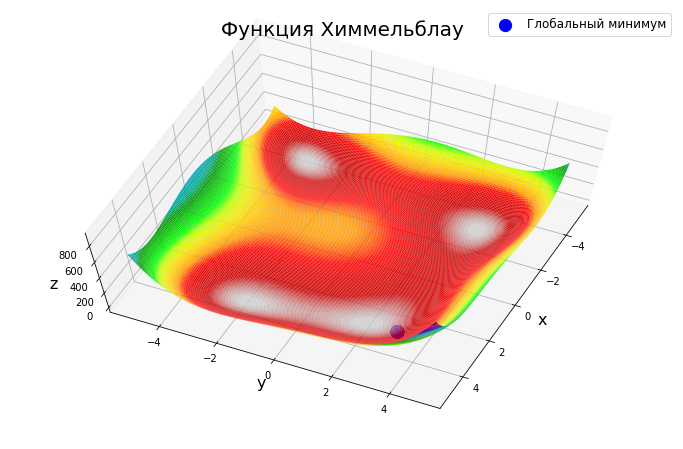

In [143]:
#Global minimum graph
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='nipy_spectral_r', linewidth=1, antialiased=True)
ax.view_init(70, 25)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Химмельблау', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

Поиск глобального минимума генетическим алгоритмом pygmo Self-adaptive Differential Evolution


In [144]:
algo = pg.algorithm(pg.sade(gen=1000))
prob = pg.problem(Himenblau())
print(prob)

Problem name: <class '__main__.Himenblau'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [145]:
pop = pg.population(prob, 100)
pop = algo.evolve(pop)
print(pop.champion_f)

[2.11921159e-10]


In [146]:
#pop.worst_idx

In [147]:
#Points function graph
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = himmelblau(X, Y)

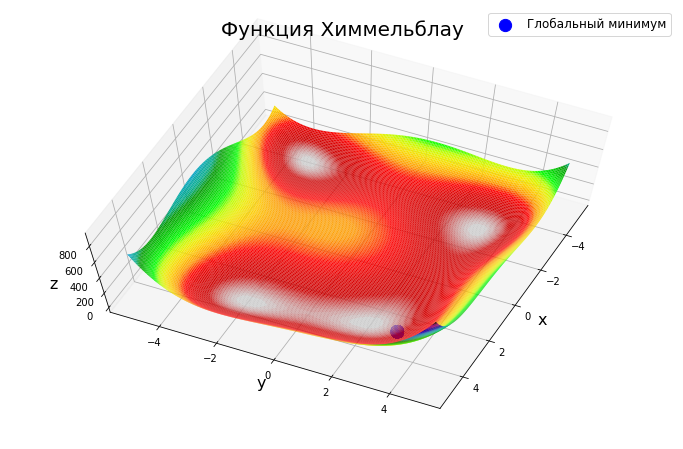

In [148]:
#Global minimum graph
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='nipy_spectral_r', linewidth=1, antialiased=True)
ax.view_init(70, 25)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Химмельблау', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

Задаем функцию Матьяса функционально и через классы, второй вариант нужен для скармливания pygmo

In [149]:
def matyas(x: np.array, y: np.array) -> float:
  return 0.26*(x*x + y*y)-0.48*x*y

In [150]:
class Matyas():
  @staticmethod
  def fitness(x):
      return [0.26*(x[0]*x[0] + x[1]*x[1])-0.48*x[0]*x[1]]

  @staticmethod
  def get_bounds():
      return ([-10, -10], [10, 10])
    
  @staticmethod
  def gradient(self, x):
      return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

In [151]:
hi = Matyas()

print(hi.fitness)

<function Matyas.fitness at 0x7f18ae385940>


Поиск глобального минимума генетическим алгоритмом pygmo Simple Genetic Algorithm

In [152]:
algo = pg.algorithm(pg.sga(gen=1000))
prob = pg.problem(Matyas())
print(prob)

Problem name: <class '__main__.Matyas'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [153]:
pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

[7.60748904e-07]


In [154]:
#pop.worst_idx

In [155]:
#Points function graph
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = matyas(X, Y)

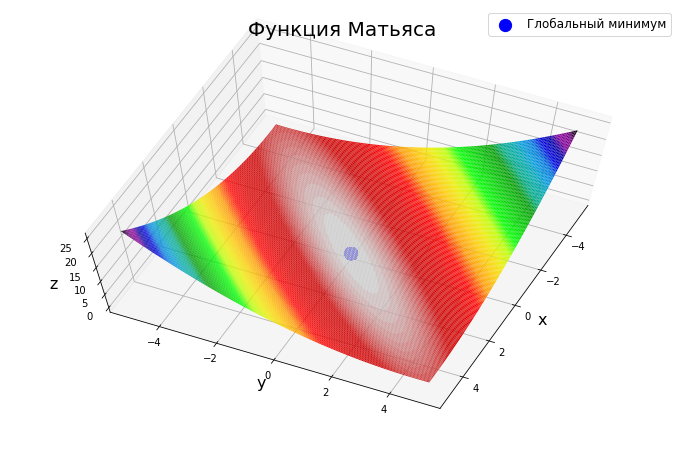

In [156]:
#Global minimum graph
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='nipy_spectral_r', linewidth=1, antialiased=True)
ax.view_init(70, 25)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Матьяса', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

Поиск глобального минимума генетическим алгоритмом pygmo Self-adaptive Differential Evolution

In [157]:
algo = pg.algorithm(pg.sade(gen=1000))
prob = pg.problem(Matyas())
print(prob)

Problem name: <class '__main__.Matyas'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [158]:
pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

[4.23861979e-16]


In [159]:
#pop.worst_idx

In [160]:
#Points function graph
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = matyas(X, Y)

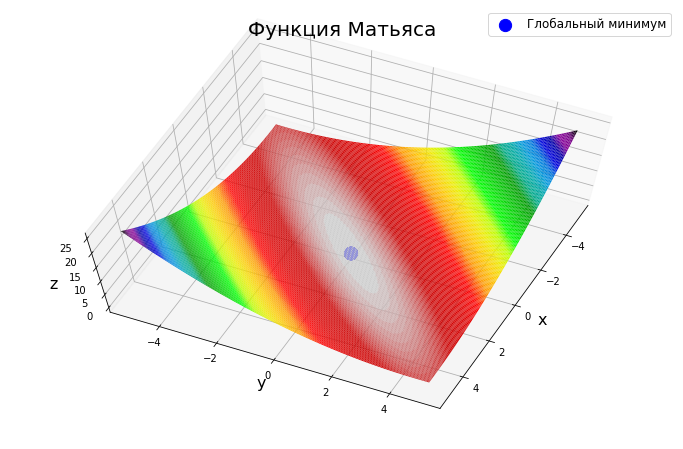

In [161]:
#Global minimum graph
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='nipy_spectral_r', linewidth=1, antialiased=True)
ax.view_init(70, 25)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Матьяса', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

2. Сконструировать алгоритмическую проблему оптимизации и решить ее при помощи библиотеки pygmo.

Поиск глобального минимума по ландшафту яркости входного изображения

(1080, 1920)

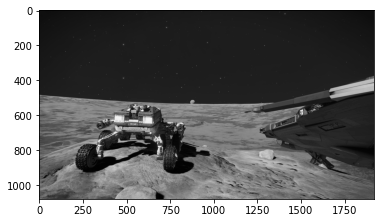

In [242]:
import cv2
img = cv2.imread('/eliteDNG.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")
img.shape

In [243]:
class Image:
    def __init__(self, img):
        self.img = img
        
    def fitness(self, x):
        return [self.img[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.img.shape[0]-1, self.img.shape[1]-1])

    def get_glob_min(self):
      return np.array([1, 1, np.amin(img)])

In [244]:
algo = pg.algorithm(pg.sga(gen=1000))
prob = pg.problem(Image(img))
print(prob)

Problem name: <class '__main__.Image'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [1079, 1919]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [245]:
pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

[9.]


In [246]:
x = pop.get_x()[pop.best_idx()]

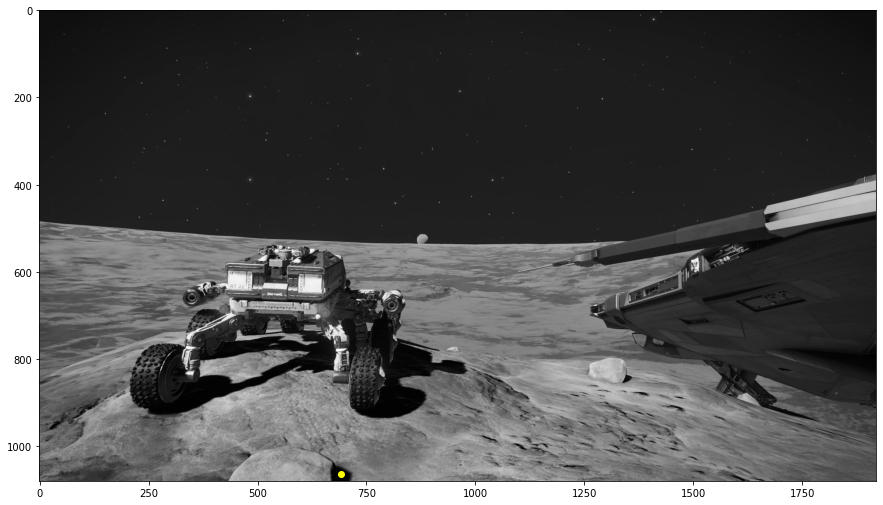

In [247]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes
plt.imshow(img, cmap="gray")
plt.scatter(x[1], x[0], lw=1, c="yellow")

In [249]:
imgOriginal = cv2.imread('/eliteDNG.png')

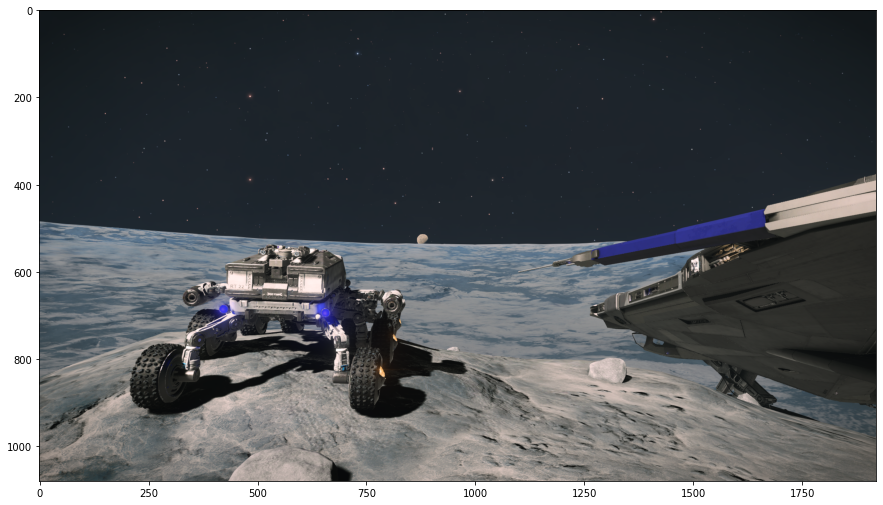

In [250]:
fig = plt.figure(figsize = (15,15))
ax = plt.axes
plt.imshow(imgOriginal)